In [1]:
import numpy as np
import pandas as pd
import pylab
from obj_function import energy_objective, uccsd_singlet_paramsize
from projectq.ops.noise_traits import scale
print(scale)

C:\Users\hp\Documents\Github\CircuitNotebooks\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(Note: This is the (slow) Python simulator.)
0.003


In [2]:
def generate_input_points():
    original_electrons = 16
    n_electrons = 2
    n_orbitals = 2

    occupied_indices = range(8 - n_electrons // 2)
    active_indices = range(8 - n_electrons // 2, 8 - n_electrons // 2 + n_orbitals)
    active_electrons = original_electrons - len(occupied_indices) * 2
    active_qubits = len(active_indices) * 2
    
    name = "C:/Users/hp/Documents/GitHub/Circuit_Notebooks/snobfit/snob_input_3.csv"
    
    amps = []
    results = []
        
    for i in range(300):
        n_amplitudes = int(uccsd_singlet_paramsize(active_qubits, active_electrons))
        current_amplitudes = [0.0] * n_amplitudes + 0.001 * np.random.randn(n_amplitudes)
        current_amplitudes = current_amplitudes / np.linalg.norm(current_amplitudes)
        amps.append(current_amplitudes.tolist())
        results.append(energy_objective(current_amplitudes))
        
#     print(amps)
#     print(results)
        
    a = np.asarray([[amps[i][0], amps[i][1], results[i]] for i in range(len(amps))])
    print(a)
#     numpy.savetxt("foo.csv", a, delimiter=",")
    with open(name, 'wb') as f:
        np.savetxt(f, a, delimiter=",",fmt='%.18f',)
        
generate_input_points()

[[ 9.07539650e-01 -4.19966409e-01 -7.78425317e+01]
 [ 8.85377515e-01  4.64872732e-01 -7.78163588e+01]
 [ 7.86148894e-01  6.18037148e-01 -7.78242351e+01]
 [-9.04285874e-01 -4.26927462e-01 -7.78450066e+01]
 [-9.01170805e-01 -4.33464163e-01 -7.78402237e+01]
 [ 9.94726135e-01 -1.02566639e-01 -7.78127613e+01]
 [-1.25413844e-01  9.92104514e-01 -7.78117372e+01]
 [ 5.93823302e-02 -9.98235312e-01 -7.79066787e+01]
 [ 5.94011507e-02 -9.98234193e-01 -7.79103378e+01]
 [-8.48609085e-01 -5.29020436e-01 -7.78518128e+01]
 [-6.37830898e-01  7.70176438e-01 -7.78349233e+01]
 [-1.90414790e-01 -9.81703727e-01 -7.79066038e+01]
 [ 4.72477083e-01  8.81342956e-01 -7.78310835e+01]
 [-3.01704372e-01  9.53401527e-01 -7.78224654e+01]
 [-2.19032292e-01  9.75717610e-01 -7.78122985e+01]
 [ 9.90152963e-02 -9.95085911e-01 -7.79074770e+01]
 [-6.35867188e-01 -7.71798497e-01 -7.78816021e+01]
 [-9.98231989e-01 -5.94381683e-02 -7.78141025e+01]
 [ 4.11044522e-01  9.11615270e-01 -7.78285289e+01]
 [ 8.63586870e-02 -9.96264110e-

In [14]:
def display_data(filename):
    df = pd.read_csv(filename)
    print(df.columns)
    finalamp1 = df.finalamp1
    finalamp2 = df.finalamp2
    halfpi_opt_energies = df.finalf
    
#     print("av_dist:", average_distance(initamp2, finalamp2))
#     print("spread:", spread_of_result(finalamp2))

#     yi = [[initamp1[i],initamp2[i]] for i in range(len(initamp1))]
#     halfpi_init_amplitudes_neg = initamp1
#     halfpi_init_amplitudes_pos = initamp2
#     halfpi_init_energies = [energy_objective(yi[i]) for i in range(len(yi))]

#     yf = [[finalamp1[i],finalamp2[i]] for i in range(len(finalamp1))]
#     halfpi_opt_amplitudes_neg = finalamp1
#     halfpi_opt_amplitudes_pos = finalamp2
#     halfpi_opt_energies = df.finalenergy

#     print(halfpi_opt_energies)

#     fig = pylab.figure(figsize=(20,15))
#     pylab.subplot(3,2,1)
# #     pylab.xlim([-.00018, .00018])
#     pylab.plot(halfpi_init_amplitudes_neg, halfpi_init_energies, 'ro')
#     pylab.xlabel("Initial amplitude at angle pi/2")
#     pylab.ylabel("Initial energy")
#     pylab.title("First amplitude element")

#     pylab.subplot(3,2,2)
#     pylab.plot(halfpi_init_amplitudes_pos, halfpi_init_energies, 'ro')
#     pylab.xlabel("Initial amplitude at angle pi/2")
#     pylab.ylabel("Initial energy")
#     pylab.title("Second amplitude element")


    fig = pylab.figure(figsize=(20,15))
    pylab.subplot(3,2,1)
#     pylab.xlim([-.00015, .00015])
    # pylab.ylim([-77.935, -77.934])
    pylab.plot(finalamp1, halfpi_opt_energies, 'ro')
    pylab.xlabel("Optimal amplitude at angle pi/2")
    pylab.ylabel("Optimal energy")
    pylab.title("First amplitude element")

    pylab.subplot(3,2,2)
#     pylab.xlim([1.9562, 1.9565])
    # pylab.ylim([-77.935, -77.934])
    pylab.plot(finalamp2, halfpi_opt_energies, 'ro')
    pylab.xlabel("Optimal amplitude at angle pi/2")
    pylab.ylabel("Optimal energy")
    pylab.title("Second amplitude element")


Index([u'finalamp1', u'finalamp2', u'finalf'], dtype='object')


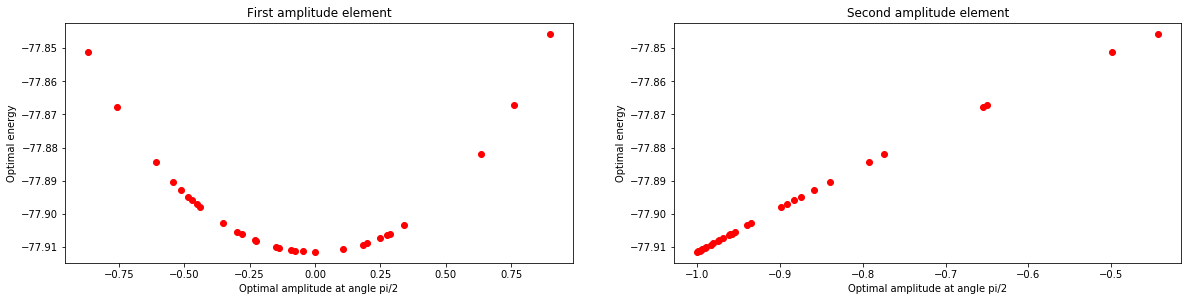

In [15]:
display_data("snobfit/snob_1.57rad_out_7_noise.csv")

Index([u'finalamp1', u'finalamp2', u'finalf'], dtype='object')


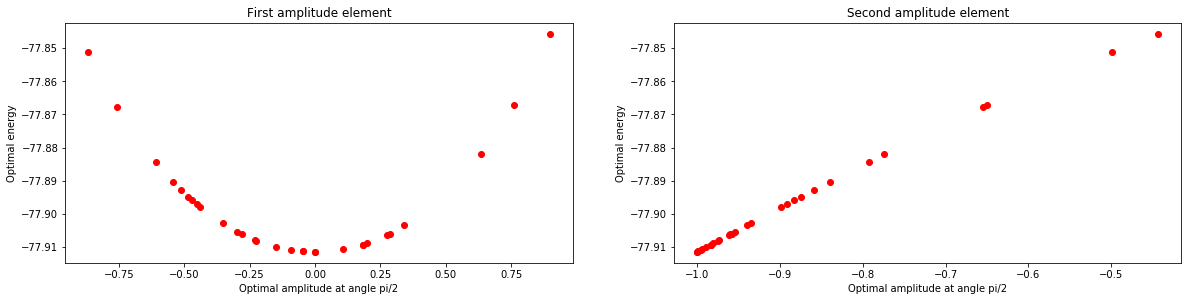

In [17]:
display_data("snobfit/snob_1.57rad_out_7_noise_mod.csv")